**CS 4099: ST: Graph Machine Learning**

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [29]:
NAME = "Phong Cao"

---

# CS4099: Colab 1

<font color='fucsia'>DUE: 11:59pm ET Thursday January 30</font>

# 1. Linear Regression (4 questions + 2 ISU)



A (multiple) linear regression is expressed as:

$y = w_0 + w_1 x_1 + \ldots + w_m x_m$

When exploring the California Housing Dataset in Colab 0, we saw that these 4 features seem to be informative about the target variable:
- MedInc
- Population
- Latitude
- Longitude



In [30]:
import numpy as np
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset from sklearn.
housing = fetch_california_housing()

Q1. Which of these 4 features should be included **in a linear regression model**? Define variable `col_names` based on your answer.

TIP: Think about which sign you expect each coefficient $w_j$ to have.

In [31]:
# A1. (1 line)
# YOUR CODE HERE
col_names = ['MedInc', 'Population', 'Latitude', 'Longitude']

print(col_names)

# get indices based on col_names
cols = [housing.feature_names.index(col_name) for col_name in col_names]

['MedInc', 'Population', 'Latitude', 'Longitude']


We will split data into training and test using only selected features.

ML train-test splits are typically 70-30 and 80-20. However, in this case, we will be more aggressive and set it to 90-10, because the training set is very large relative to the number of model parameters.

In [32]:
'''
PRO TIP: We must split the data into training and test sets before we
start instantiating models. If you wait to this later, there is a higher chance
that you will make a mistake that leads to leakage between training & test sets.

PRO TIP: Splitting the data involves randomization. In order to ensure
reproducibility, set the random seed before/when you calling functions.
'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing.data[:,cols], housing.target, test_size=0.1, random_state=42)

Q2. Now you need to z-normalize the features, i.e., subtract their respective means and divide by their respective standard deviations. Make sure to apply same transformations to validation and test sets too.

You can either do it manually or use a function from sklearn.

In [33]:
# A2. (~3-4 lines)
# YOUR CODE HERE

means = np.mean(X_train, axis = 0)
stds = np.std(X_train, axis=0)

X_train = (X_train - means) / stds
X_test = (X_test - means) / stds

print(X_train[:5], X_train.shape)
print(X_test[:5], X_test.shape)

[[-0.01883674 -0.00969912 -0.80886286  0.64130268]
 [ 2.18523706 -0.13251859  0.9803686  -1.43975779]
 [-0.10658316  1.09743063  0.8539046  -1.28505066]
 [-0.37769845 -0.55712303  1.46280536 -0.81593871]
 [ 0.55838671 -0.01408553  0.55882192 -0.08731802]] (18576, 4)
[[-1.15848302 -0.03075389  0.19816532  0.28198288]
 [-0.7091262   0.12101588 -0.23274907  0.05740801]
 [-0.20759726 -0.102691    1.01315557 -1.42977669]
 [ 0.9857012   0.24383535 -0.63556034  0.42670891]
 [-0.07814486 -0.31937963  0.46046103 -1.1752585 ]] (2064, 4)


## Loss function and Exact Solution

Here we'll use the MSE as the loss function. This leads to an optimization problem known as the Ordinary Least Squares (OLS):
$$
\min_\mathbf{w} \|\mathbf{X}\mathbf{w} - \mathbf{y}\|^2,
$$
where $\mathbf{X} \in \mathbb{R}^{n \times (1+m)}$ is the design matrix where each row represents one observation and the first column is a vector of 1's.


The exact solution to OLS is given by
$$\mathbf{w} = \left(\sum_{i=1}^n \mathbf{x}^{(i)} {\mathbf{x}^{(i)}}^\top \right)^{-1}\sum_{i=1}^n \mathbf{x}^{(i)} \mathbf{y}^{(i)}. $$

PRO TIP: Inside the parentheses is a sum of outer products. The result IS NOT A SCALAR. As a sanity check, make sure that the matrix dimensions are $(m+1)\times(m+1)$.

The solution can be rewritten as
$$\mathbf{w} = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1}\mathbf{X}^\top \mathbf{y}.$$

To think about: Is $\mathbf{X}^\top \mathbf{X}$ always invertible?

Q3. We will find the optmimal parameters for the Linear Regression by computing the expression above for $w$. Make sure to augment matrix $\mathbf{X}$ (training and test) so that the intercept is automatically included in $w$.

In [34]:
# Add a column of ones to X_train and X_test for the intercept
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Calculate the inverse of X^T * X
X_invert = np.linalg.inv(X_train.T @ X_train)

# Calculate the weights w using the correct OLS formula
w = X_invert @ X_train.T @ y_train

print("Optimal parameters (w):", w)


Optimal parameters (w): [ 2.06861739  0.69823853 -0.04568336 -1.03988835 -0.99906966]


## Prediction and Evaluation

Q4. (a) Now use model parameters $w$ to predict house prices for the test set.

(b) Also, compute the root mean squared error. Is this high or low relative to the values of $y$?

In [35]:
# A4a. (1 line)
# YOUR CODE HERE
y_test_pred = X_test @ w
print(y_test_pred)

[0.7733345  1.75262819 2.30323408 ... 3.06832575 1.63521217 1.75067573]


In [36]:
# A4b. (~1-2 lines + CONDITION)
# YOUR CODE HERE
# A4b. (~1-2 lines + CONDITION)
# Compute RMSE
rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

# Compare RMSE to the range of y
if rmse < 0.2 * (np.max(y_test) - np.min(y_test)):  # If RMSE is less than 20% of the range
    print(f'RMSE {rmse:.4f} is low relative to the values of y')
else:
    print(f'RMSE {rmse:.4f} is high relative to the values of y')


RMSE 0.7609 is low relative to the values of y


Q5. [ISU STUDENTS ONLY] Compute the Mean Absolute Error on the test set, defined as
$\textrm{MAE} = \frac{1}{n}\sum_{i=1}^n |y^{(i)} - \widehat{y}^{(i)}|$.

In [ ]:
# # A5. (~1-2 lines)
# YOUR CODE HERE
raise NotImplementedError()
print(mae)

Let's plot the ground-truth prices $y$ against the predictions $\hat y$. We will add the line y=x to facilitate the visual analysis.

In [ ]:
import matplotlib.pyplot as plt

# plot y and y_pred
fig, ax = plt.subplots(1, 1, figsize=(4,3.5))
ax.scatter(y_test, y_pred, alpha=.1)
ax.set_xlabel('ground-truth y')
ax.set_ylabel(r'prediction $\hat y$')
ax.set_ylim(ax.get_xlim())
ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')

Q6. [ISU STUDENTS ONLY] Based on the plot above, can we conclude that this linear regression model tends to overestimate the ground-truth values?

YOUR ANSWER HERE

# 2. Gradient Descent (3 questions + 1 ISU)

You will now apply the gradient descent to the linear regression using the California Housing dataset to see if you can get to the same coefficients.

First, you need to initialize the parameter vector w. A good way to do so is to use the standard Gaussian distribution.

Q1. (a) Initialize vector `w0` from a Gaussian distribution with sdev 1e-2.

(b) Compute the predictions `y_pred` for the training set using `w0`.

(c) Compute the MSE loss.


In [37]:
np.random.seed(42)
# A1a. (~2 lines)
# YOUR CODE HERE
w0 = np.random.randn(X_train.shape[1]) * 1e-2
print(f'Model coefficients: {np.round(w0,3)}')

# A1b. (~1 line)
# YOUR CODE HERE
y_pred = X_train @ w0
print(y_pred[:5])

# A1c. (~1-2 lines)
# PRO TIP: tracking the train loss at the beginning and during optimization is
# key for debugging, determining convergence
# YOUR CODE HERE
loss = np.mean((y_train - y_pred) ** 2)  # Compute the mean squared error
print(f'Training loss = {loss:.3f}')

Model coefficients: [ 0.005 -0.001  0.006  0.015 -0.002]
[-0.00889049  0.01938998  0.02823665  0.02607045  0.01281934]
Training loss = 5.598


Q2. Implement the function `gradient_descent` below and run it for 10 steps using a learning rate $\alpha = 0.2$. Print the loss at each iteration, before performing a step.

In [38]:
# A2. FILL IN THE BLANKS
# gradient descent
def gradient_descent(x_train, y_train, w0, alpha, num_steps):
    # initialize w and dW
  # PRO TIP: CREATE DEEP COPY of arrays passed as args to avoid changing them
  # YOUR CODE HERE
  
    w = w0.copy()
    prev_loss = float('inf')  # Set loss at inf init
    tol = 1e-6  # Threshold consider the model is converge
    
    for i in range(num_steps):
    # compute loss (2 lines)
        y_pred = x_train @ w
        loss = np.mean((y_train - y_pred) ** 2)
        print(f'Training loss = {loss:.3f}')
        
    # Convergence check: 
        if abs(prev_loss - loss) < tol:
            print(f'Converged in {i + 1} steps!')
            return w, i + 1
        
        prev_loss = loss

    # compute gradients and update params (2 lines)
    # YOUR CODE HERE
        dW = -(2 / len(y_train)) * x_train.T @ (y_train - y_pred)
        w -= alpha * dW
    return w, num_steps

# call gradient descent function
# YOUR CODE HERE

model_result = gradient_descent(X_train, y_train, w0, alpha=0.2, num_steps=1000)
print(f'Optimized coef: {model_result[0]}')
print(f'Convergence step: {model_result[1]}')


Training loss = 5.598
Training loss = 2.443
Training loss = 1.306
Training loss = 0.893
Training loss = 0.740
Training loss = 0.681
Training loss = 0.657
Training loss = 0.644
Training loss = 0.637
Training loss = 0.631
Training loss = 0.626
Training loss = 0.622
Training loss = 0.618
Training loss = 0.614
Training loss = 0.610
Training loss = 0.607
Training loss = 0.604
Training loss = 0.601
Training loss = 0.598
Training loss = 0.595
Training loss = 0.592
Training loss = 0.590
Training loss = 0.588
Training loss = 0.585
Training loss = 0.583
Training loss = 0.581
Training loss = 0.580
Training loss = 0.578
Training loss = 0.576
Training loss = 0.575
Training loss = 0.573
Training loss = 0.572
Training loss = 0.571
Training loss = 0.569
Training loss = 0.568
Training loss = 0.567
Training loss = 0.566
Training loss = 0.565
Training loss = 0.564
Training loss = 0.563
Training loss = 0.563
Training loss = 0.562
Training loss = 0.561
Training loss = 0.560
Training loss = 0.560
Training l

Q3. How many steps are necessary to converge using this learning rate? You can either find it manually or write a variant of the function above that stops when it "converges".

In [62]:
# A3. (~1-10 lines)
# YOUR CODE HERE
print(f'Convergence step: {model_result[1]}')

# The code is above with model converge at step 159 with threshold 1e-6

Convergence step: 159



Q4. [ISU STUDENTS ONLY] Play with the learning rate and try to find a value that leads to a loss below 0.7 in a single step. It is OK to find it manually.

In [ ]:
# A4. (~1-4 lines)
# YOUR CODE HERE
raise NotImplementedError()

# 3. Logistic Regression (1 question + 1 ISU)

In this portion, we will work again with the `Breast Cancer` dataset, which contains information about suspected cells.

In [39]:
# load UCI breast cancer dataset
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [40]:
# create a pandas dataframe containing both the features and the label
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['label'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [41]:
# Analyzing the features would allow us to find this informative subset:
# We'll not talk about how to get to these features in class
x = df[['mean radius', 'mean texture', 'mean smoothness',
       'mean compactness', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error', 'compactness error',
       'symmetry error', 'fractal dimension error']]
y = df['label']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

First, you will train the model using sklearn Logistic Regression class.

In [42]:
# train the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

# print the model coefficients using 3 decimals
print(np.round(model.coef_, 3))

[[-0.989 -0.234 -0.451 -1.357 -0.711 -0.169 -2.116  0.15  -0.02  -0.239
  -0.048 -0.025]]


Let's make predictions and compute the model test accuracy.

In [43]:
y_pred = model.predict(x_test)
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.865


You can think of the predicted probabilities $\hat y$ as the "confidence" of the model that the label is 1.0 (or 0.0, if you take $1- \hat y$).

Does the model make more mistakes for high confidence predictions or for low confidence ones?

Q1. Compute the accuracy in the test examples when the confidence is:
(a) between 80% and 100%;
(b) between 60% and 80%;

In [44]:
# A1(a-b) (~5 lines)
# YOUR CODE HERE
y_prob = model.predict_proba(x_test)
confidence = np.max(y_prob, axis=1)

def compute_acc(low, high):
    mask = (confidence >= low) & (confidence < high)
    accuracy = np.mean(y_pred[mask] == y_test[mask])  # Compare to actual labels
    return accuracy
   
high_confidence_acc = compute_acc(0.8, 1)
low_confidence_acc = compute_acc(0.6, 0.8)
print(f'Accuracy for high confidence predictions: {high_confidence_acc:.3f}')
print(f'Accuracy for low confidence predictions: {low_confidence_acc:.3f}')

Accuracy for high confidence predictions: 0.962
Accuracy for low confidence predictions: 0.643


A model is considered **well-calibrated** when accuracy is aligned with confidence values.

Q2. [ISU ONLY] Can two logistic regression models have the same test accuracy but different calibration? Explain your answer.

YOUR ANSWER HERE

# Decision Tree (ungraded)

We will work with the Iris Flower Dataset.

The Iris flower data set is a commonly used example:
- Created by statistician/biologist Ronald Fisher for his paper “The use of multiple measurements in taxonomic problems”.
- Data set consists of 150 flower measurements from 3 different species.
- For each, we have “petal length”, “petal width”, “sepal length”, “sepal width”.

Goal is to predict species from other data.

In [ ]:
# Load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# let's look at the data
print(iris.data[:5])
print(iris.target[:5])
print(iris.target_names)
print(iris.feature_names)

In this notebook, we will use only features "petal_length" and "petal_width".

In [24]:
cols = [2, 3]
X = iris.data[:, cols]
y = iris.target

Create a nice scatter plot of the data colorcoding the points based on the iris species. A good plot must clearly label the axes and include a legend if applicable.

In [ ]:
import matplotlibe as plt

fig, ax = plt.subplots(1, 1, figsize=(4,3))
for target_class in range(3):
    ax.scatter(iris.data[iris.target==target_class,cols[0]],
               iris.data[iris.target==target_class,cols[1]],
               label=iris.target_names[target_class])
ax.set_xlabel(iris.feature_names[cols[0]])
ax.set_ylabel(iris.feature_names[cols[1]])
ax.legend(iris.target_names)
ax.set_title('Iris Dataset')

In [ ]:
# prepare data
x = iris.data[:,cols]
y = iris.target_names[iris.target]

# split in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [ ]:
# create pandas dataframe with x and y
df = pd.DataFrame(x_train, columns=[iris.feature_names[col][:-5] for col in cols])
df['species'] = y_train

np.random.seed(42)
four_random_rows = df.sample(4)
four_random_rows

In [ ]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit( x_train, y_train)

In [ ]:
# check predictions for training data; do not include column 'species'
decision_tree_model.predict(four_random_rows.drop('species', axis=1).values)

In [ ]:
tree.plot_tree(decision_tree_model)

## Prediction

We will create a simple data frame with four rows. Then we will make predictions for these rows.

In [ ]:
# create pandas dataframe with x and y
df = pd.DataFrame(x_train, columns=[iris.feature_names[col][:-5] for col in cols])
df['species'] = y_train

np.random.seed(42)
four_random_rows = df.sample(4)
four_random_rows

In [ ]:
# check predictions for training data; do not include column 'species'
decision_tree_model.predict(four_random_rows.drop('species', axis=1).values)

In [ ]:
tree.plot_tree(decision_tree_model);

In [ ]:
# better visualization with graphviz library
import graphviz

dot_data = tree.export_graphviz(decision_tree_model, out_file=None,
                      feature_names=["petal_length", "petal_width"],
                      class_names=["setosa", "versicolor", "virginica"],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render(format="png", filename="iris_tree")
graph

Last, we will color the feature space to illustrate the decision boundaries.

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns

sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])
hue_order = ["setosa", "versicolor", "virginica"]

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)

sns.scatterplot(data = df, x = "petal length", y="petal width", hue="species", hue_order=hue_order);


#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries.png", dpi=300, bbox_inches = "tight")

# 4. Ensemble Methods & Hyperparameter Tuning

Let's look at one case study applying Ensemble Methods to the UCI Car Evaluation dataset.

In [ ]:
# based on https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
# load car evaluation dataset
import pandas as pd

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None, names=col_names)
df

Note above that even the variables 'doors' and 'persons' have string values. Even though it is tempting to convert doors to numeric, in this case it is better to use a LabelEncoder and convert every feature to one-hot encodings.

## Random Forest (2 ISU)

Bagging is a technique that allows us to reduce the variance of weak learners by training them independently with bootstrap samples of data.

Random Forest extends the concept of bagging and also samples the subset of features that can be used in each tree.

Q1. [ISU STUDENTS ONLY] Using sklearn's `LabelEncoder`, transform all features as well as the label (column 'class').

HINT: Check if you have to use two instances of a single instance of that class.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# define X and y
X = df.drop(['class'], axis=1)
y = df['class']

# A1. encode X and y using LabelEncoder (~4 lines)
# YOUR CODE HERE
raise NotImplementedError()

# 85-15 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
X_train.shape, X_test.shape

Q2. [ISU STUDENTS ONLY] (a) Let's fit a Random Forest using sklearn's `RandomForestClassifier` with 10 trees. (What is the parameter that determines the number of trees?)

(b) Compute the test accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# A2a. (~2 lines)
# YOUR CODE HERE
raise NotImplementedError()


# A2b. (~2-3 lines)
# YOUR CODE HERE
raise NotImplementedError()
print('Acc for Random Forest 10 decision-trees : {0:0.4f}'. format(acc))

## Boosting and XGBoost (ungraded)

Boosting is an ensemble technique used for reducing bias of weak learners.

XGBoost builds upon Gradient Tree Boosting, but includes a regularization term in the loss function, uses subset of features when splitting tree nodes (like in Random Forest), uses a second order approximation rather than just the gradient.

Let's fit an XGBoost model with 20 estimators.

In [ ]:
from xgboost import XGBClassifier

# instantiate XGBoost model
xgb = XGBClassifier(n_estimators=10, random_state=42)

# fit the model
xgb.fit(X_train, y_train)

# Predict the Test set results
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)
print('Acc for XGBoost 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

## Hyperparameter Tuning (2 questions)

Random Forest has some key hyperparameters:
- n_estimators,
- min_samples_split,
- etc

Let's find the configuration of the two hyperparameters above that leads to the best results.

Q3. You MUST create a validation set in order to evaluate the hyperparameter configurations. Otherwise, if you choose the best hypers based on the test set, you won't have "unseen data" to test the model performance. Use a 70-15-15 train-val-test split.









In [63]:
# A3. (2 lines)
# YOUR CODE HERE

print(X_train.shape, X_val.shape, X_test.shape)

NameError: name 'X_val' is not defined

Q4. You will implement a grid search manually. You will need to:

(a) Create a list of values for each param. `n_estimators` will vary from 10 to 100 (steps of 30) and `min_samples_split` will vary from 2 to 6.

(b) Initialize variables `best_acc` and `best_hypers` to keep track of best accuracy and best hyperparameters.

(c) Create one nested for loop for each parameter

(d) Compute the accuracy

(e) Update variables with the best configuration if applicable

In [ ]:
# grid search to tune Random Forest n_estimators and min_samples_split

# A4a. ~2 lines)
# YOUR CODE HERE
raise NotImplementedError()
print(n_estimators_list)
print(min_samples_split_list)

# A4b. (~2 lines)
# YOUR CODE HERE
raise NotImplementedError()

# PRO TIP: use library tqdm to track progress and estimate remaining time
# PRO TIP: use itertools.product to avoid writing one for loop for each param
# A4c. (~1-2 lines)
# YOUR CODE HERE
raise NotImplementedError()
    # instantiate the classifier
    rfc = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, random_state=42)
    # fit the model
    rfc.fit(X_train, y_train)

    # A4d. (~2 lines)
    # YOUR CODE HERE
    raise NotImplementedError()

    # A4e. INSERT YOUR CODE BELOW (~2-3 lines)
    # YOUR CODE HERE
    raise NotImplementedError()

print('Best hyperparameters:', best_hypers)
print(f'Best accuracy: {best_acc:.3f}')

TAKEAWAYS:
1. Hyperparameter tuning is crucial to get the best performance possible from a model.
2. The best accuracy on the validation set is still an overestimate, but this does not invalidate the fact that the winning configuration is among the best.

PRO TIP: increasing number of trees alone in Random Forest WILL NOT cause it to overfit. However, it suffers from diminishing returns, so the additional cost to fit/predict may not be worth to increase the number of trees beyond a certain point.

# 5. Graph Properties (4 questions + 2 ISU)

In this colab, we will take a real graph and compute some basic statistics from its adjacency matrix.

In [64]:
# load networkx and the zachary karate club network
import networkx as nx
G = nx.karate_club_graph()

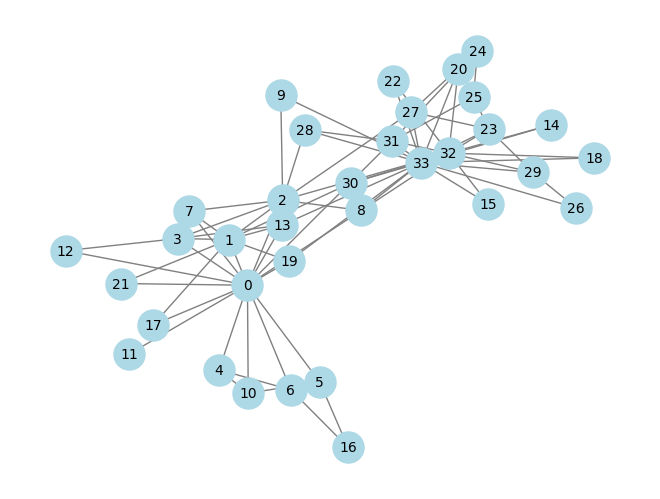

In [65]:
pos = nx.spring_layout(G)  # Compute node positions
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=10)
plt.show()


Q1. Extract its adjacency matrix $A$ and show how to compute the degree of all nodes with a single matrix-vector multiplication involving matrix $A$ and an appropriately chosen vector $x$.

In [67]:
# A1. (3 lines)
# YOUR CODE HERE

# Convert graph to adjacency matrix
A = nx.to_numpy_array(G)  
print("Adjacency matrix A: ", A, A.shape)


x = np.ones(A.shape[0])  # Vector of ones
degree = A @ x  # Matrix-vector multiplication

print(f'Degree of all nodes: {degree}')

Adjacency matrix A:  [[0. 4. 5. ... 2. 0. 0.]
 [4. 0. 6. ... 0. 0. 0.]
 [5. 6. 0. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 0. 4. 4.]
 [0. 0. 2. ... 4. 0. 5.]
 [0. 0. 0. ... 4. 5. 0.]] (34, 34)
Degree of all nodes: [42. 29. 33. 18.  8. 14. 13. 13. 17.  3.  8.  3.  4. 17.  5.  7.  6.  3.
  3.  5.  4.  4.  5. 21.  7. 14.  6. 13.  6. 13. 11. 21. 38. 48.]


Q2. (a) Compute degree counts--number of times each degree appears-- and (b) save the empirical PMF (probability mass function) of the degree to variable `prob`.

In [68]:
from collections import Counter

# A2a. (~3-5 lines)
# PRO TIP: use special structures from collections such as defaultdict or Counter
# YOUR CODE HERE
degree_counts = Counter(dict(G.degree()).values())
print(degree_counts)

# A2b. (~1-3 lines)
# YOUR CODE HERE
prob = {k: v / G.number_of_nodes() for k, v in degree_counts.items()}
print(f'Probability: {prob}')

Counter({2: 11, 3: 6, 4: 6, 5: 3, 6: 2, 16: 1, 9: 1, 10: 1, 1: 1, 12: 1, 17: 1})
Probability: {16: 0.029411764705882353, 9: 0.029411764705882353, 10: 0.029411764705882353, 6: 0.058823529411764705, 3: 0.17647058823529413, 4: 0.17647058823529413, 5: 0.08823529411764706, 2: 0.3235294117647059, 1: 0.029411764705882353, 12: 0.029411764705882353, 17: 0.029411764705882353}


Q3. (a) Compute the empirical distribution ($F_k$) and then (b) plot it. A proper plot should clearly label the axes.

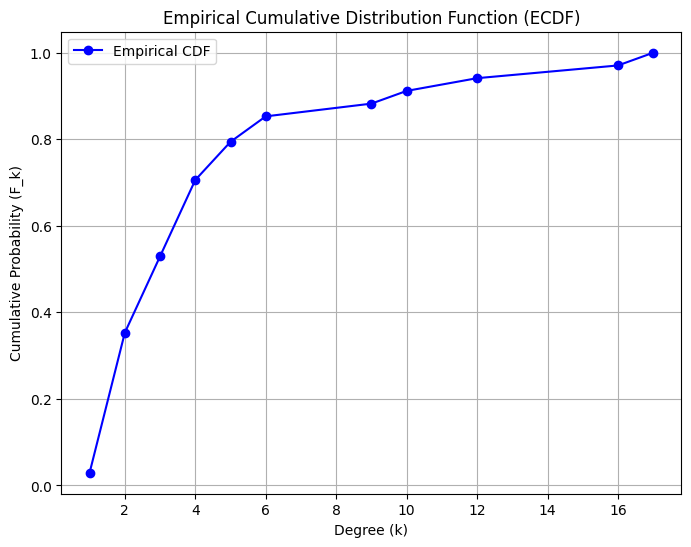

In [69]:
# A3a. (~1-4 lines)
# PRO TIP: check out function cumsum from numpy
# YOUR CODE HERE
# Compute empirical CDF (cumulative sum of PMF)
sorted_degrees = sorted(prob.keys())  # Sort degrees
F_k = np.cumsum([prob[k] for k in sorted_degrees])  # Cumulative sum

# A3b. (~4-6 lines)
# YOUR CODE HERE
import matplotlib.pyplot as plt

# Plot the ECDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_degrees, F_k, marker='o', linestyle='-', color='b', label="Empirical CDF")

# Labels and title
plt.xlabel("Degree (k)")
plt.ylabel("Cumulative Probability (F_k)")
plt.title("Empirical Cumulative Distribution Function (ECDF)")
plt.grid(True)
plt.legend()
plt.show()


Q4. Write a mathematical expression using only the elements of $A$ that computes the number of paths of length 2 between nodes $i$ and $j$ in any graph (directed or undirected).

Use must use a summation. You don't have to use latex notation if you are not used to it.

A4. $n_{i,j} = \sum_{k \in V} A_{i,k} A_{k,j}$.

Q5. [ISU STUDENTS ONLY] Implement code that computes the expression you answered in the previous question for **all pairs of nodes** at once, as a single matrix multiplication.

In [ ]:
# A5. (1 line)
# YOUR CODE HERE
raise NotImplementedError()

print(num_paths[0,25])

Q6. [ISU STUDENTS ONLY] Find one (any) node with the largest local clustering coefficient. Return BOTH the node and its clustering coefficient.

You are allowed to use `networkx` functions.

In [ ]:
# A6. (~3 lines)
# YOUR CODE HERE
raise NotImplementedError()

print(f'Max clustering coefficient: {max_cc}')
print(f'Node with max clustering coefficient: {node_highest_cc}')